In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

### Loading the data

In [3]:
df= pd.read_csv("C:/Users\AZADC\Downloads\data_for_lr.csv")

In [4]:
df.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [7]:
df.isnull().sum()

x    0
y    1
dtype: int64

###  Data Processing

In [8]:
df= df.dropna()
print('Shape of the data', df.shape)

Shape of the data (699, 2)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


### Splitting data

In [11]:
# training input and output

train_input=np.array(df.x[0:500]).reshape(500,1)
train_output = np.array(df.y[0:500]).reshape(500,1)

# Validation data input and output
test_input = np.array(df.x[500:700]).reshape(199,1)
test_output = np.array(df.y[500:700]).reshape(199,1)

### <font color = "green">Linear Regression</font>

#### Forward propagation

#### f(x) = mx+c

In [17]:
def forward_propagation(train_input, parameters):
    m=parameters['m']
    c=parameters['c']
    
    predictions =np.multiply(m, train_input) +c
    return predictions

###  Cost Function

#### formula = summation(1/2n *(y-f(x)^2)

In [19]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) **2)*0.5
    
    return cost

### Gradient Descent for Backward Propagation

#### df = f(x) +y

#### dm = df*x

#### dc= df*1

In [48]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    
    df= predictions - train_output
    dm = np.mean(np.multiply(df,train_input))
    dc = np.mean(df)
    
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

###  Update Parameters

#### m = m - (learning_rate * dm)


####  c=c - (learning_rate* dc)

In [49]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate* derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate* derivatives['dc']
    
    return parameters

### Model Training

In [50]:
def train(train_input, train_output,learning_rate, iters):
    #randaom parameters
    
    parameters =dict()
    parameters['m']= np.random.uniform(0,1)
    parameters['c']= np.random.uniform(0,1)
    
    plt.figure()
    
    #loss list
    loss= list()
    
    #iteration
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost
        cost = cost_function(predictions, train_output)
        
        loss.append(cost)
        print(f"Iteraton = {i+1}, Loss = {cost}")
        
        #plot 
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label ='original')
        ax.plot(train_input, predictions, '+', label ='Training')
        
        
        legend= ax.legend()
           
        #backward propagation
        derivatives = backward_propagation(train_input,train_output, predictions)
        
        #update parameters
        
        parameters= update_parameters(parameters, derivatives, learning_rate)
        
    return parameters ,loss

###  Training

Iteraton = 1, Loss = 1509.1523282269259
Iteraton = 2, Loss = 686.8641372543769
Iteraton = 3, Loss = 313.79107300950403
Iteraton = 4, Loss = 144.5274093302263
Iteraton = 5, Loss = 67.73229643531155
Iteraton = 6, Loss = 32.89026745330064
Iteraton = 7, Loss = 17.082399111599443
Iteraton = 8, Loss = 9.910350535487975
Iteraton = 9, Loss = 6.656382952474941
Iteraton = 10, Loss = 5.1800530559190925
Iteraton = 11, Loss = 4.51023934675409
Iteraton = 12, Loss = 4.206342925199318
Iteraton = 13, Loss = 4.068463582398808
Iteraton = 14, Loss = 4.005906372176909
Iteraton = 15, Loss = 3.97752289699625
Iteraton = 16, Loss = 3.964644083316469
Iteraton = 17, Loss = 3.9587997517936637
Iteraton = 18, Loss = 3.956146972677581
Iteraton = 19, Loss = 3.954942204483947
Iteraton = 20, Loss = 3.954394400510117


C:\Users\AZADC\AppData\Local\Temp\ipykernel_7396\898133382.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


<Figure size 640x480 with 0 Axes>

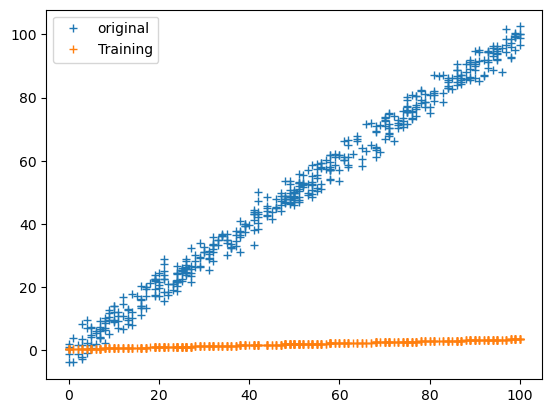

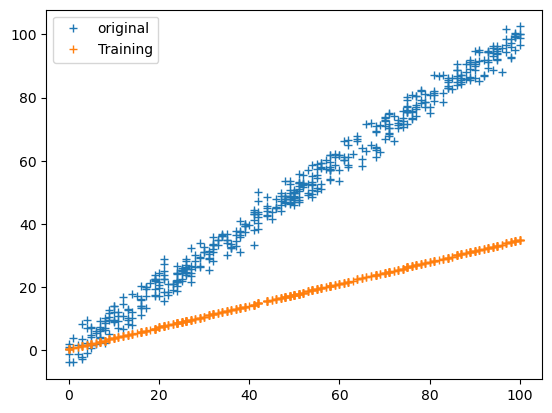

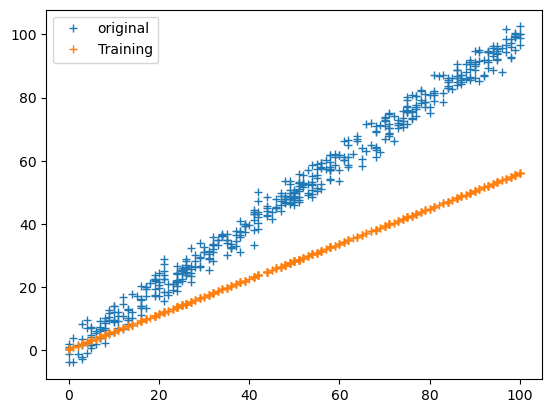

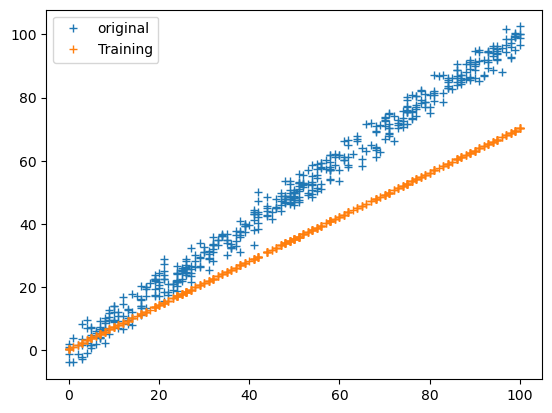

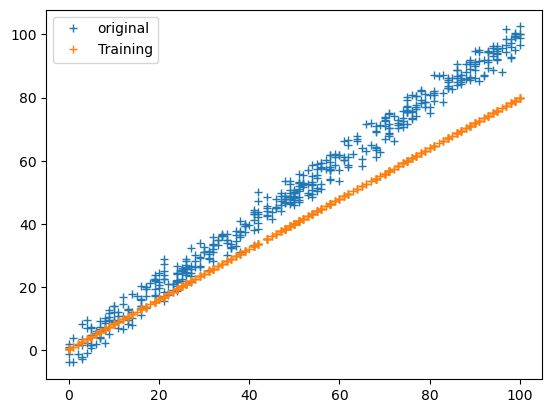

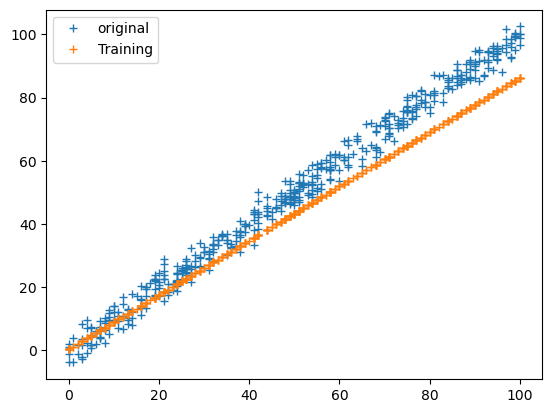

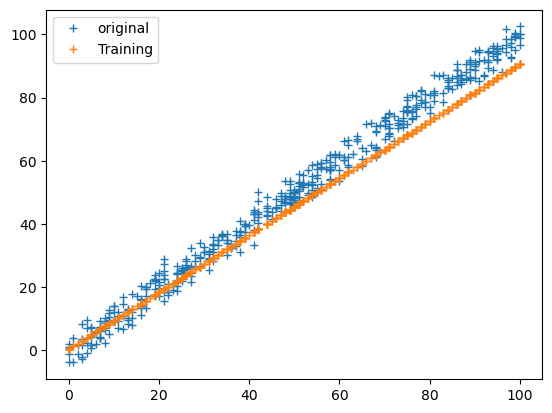

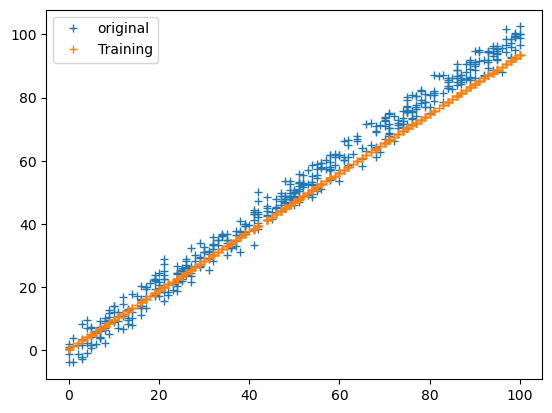

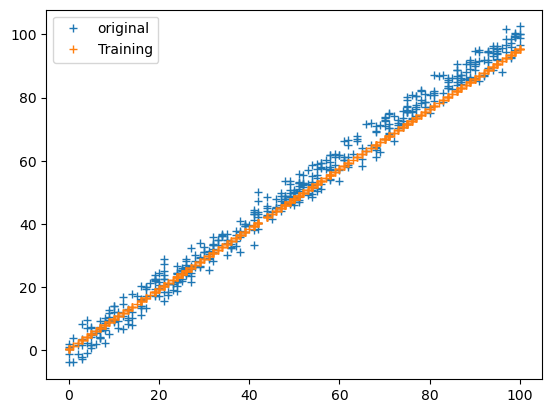

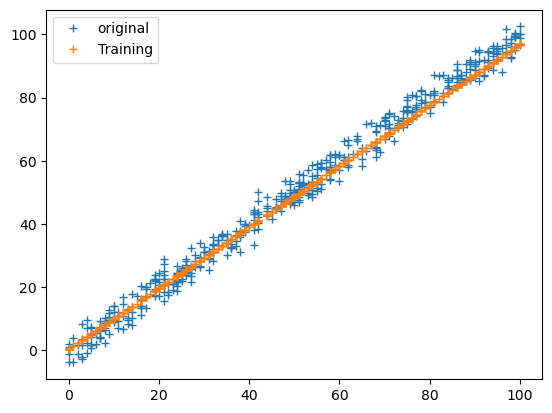

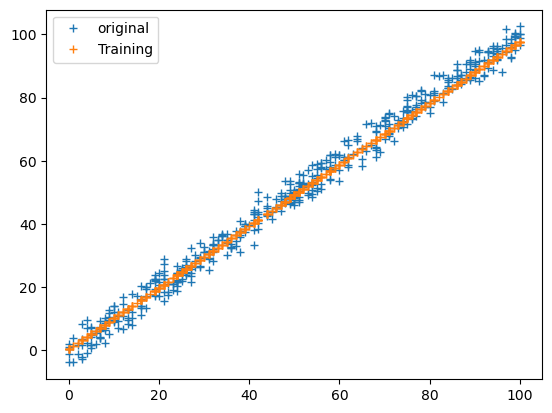

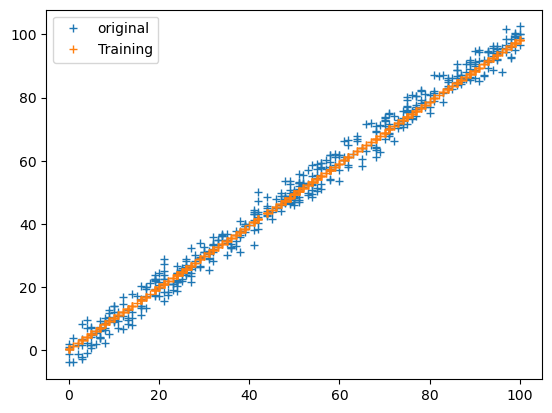

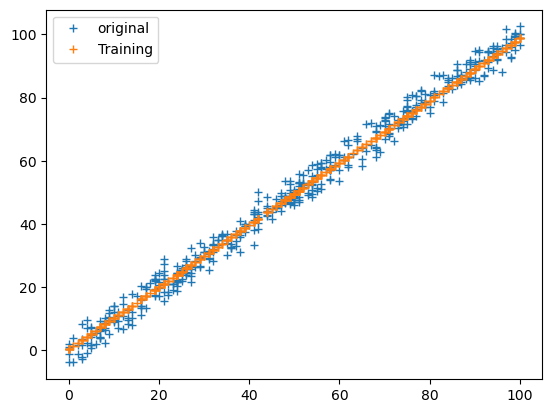

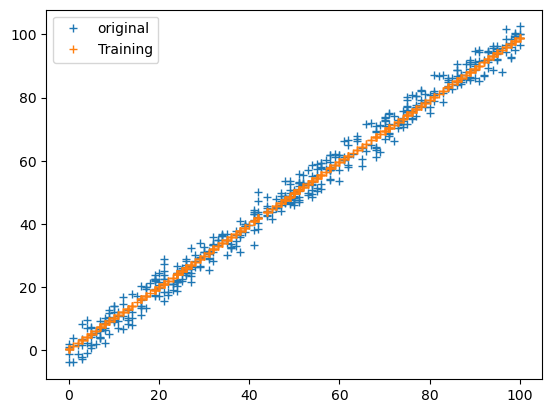

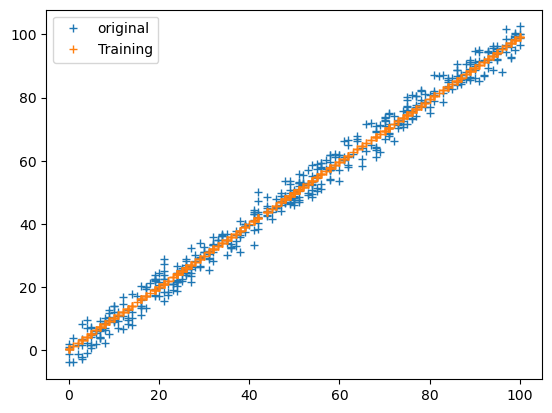

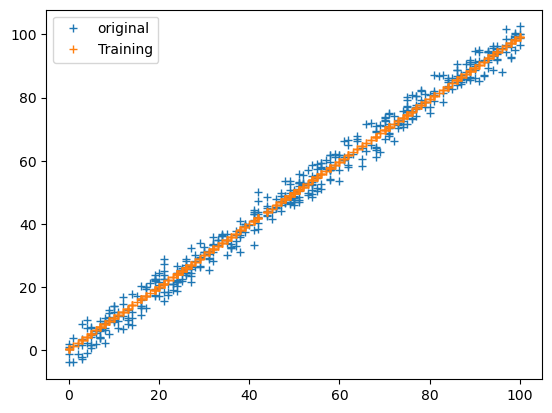

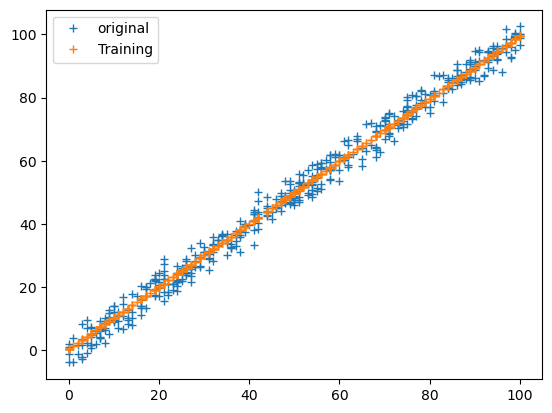

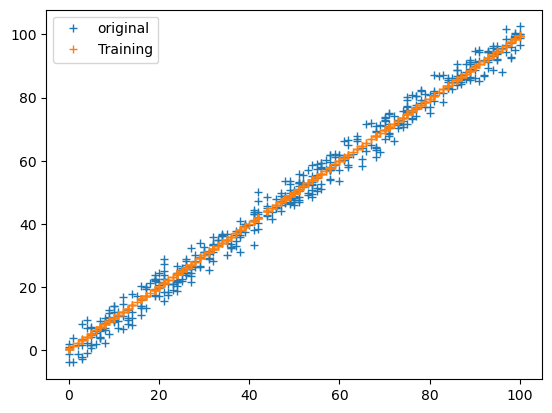

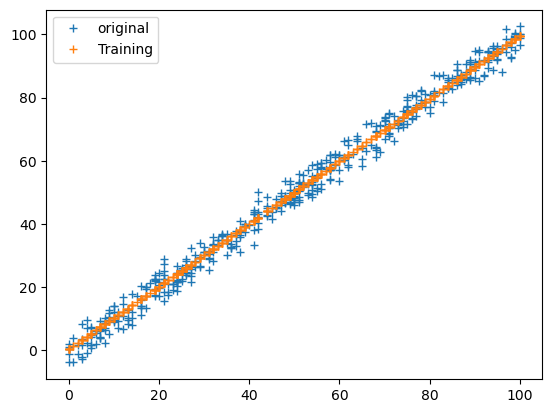

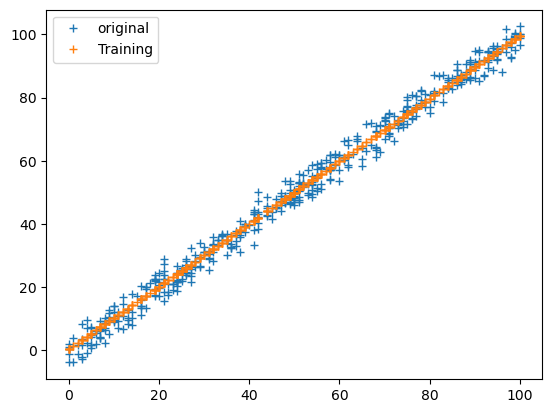

In [51]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [52]:
print(parameters)

{'m': 0.9917385438920064, 'c': 0.3521460416014383}


In [53]:
loss

[1509.1523282269259,
 686.8641372543769,
 313.79107300950403,
 144.5274093302263,
 67.73229643531155,
 32.89026745330064,
 17.082399111599443,
 9.910350535487975,
 6.656382952474941,
 5.1800530559190925,
 4.51023934675409,
 4.206342925199318,
 4.068463582398808,
 4.005906372176909,
 3.97752289699625,
 3.964644083316469,
 3.9587997517936637,
 3.956146972677581,
 3.954942204483947,
 3.954394400510117]

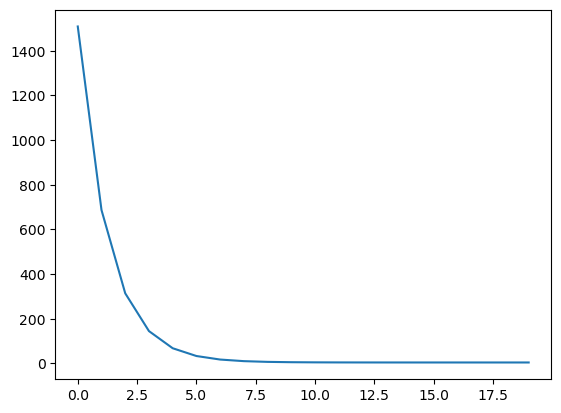

In [55]:
plt.plot(loss)

### Let's Predict

In [56]:
test_predictions = test_input * parameters['m'] + parameters['c']


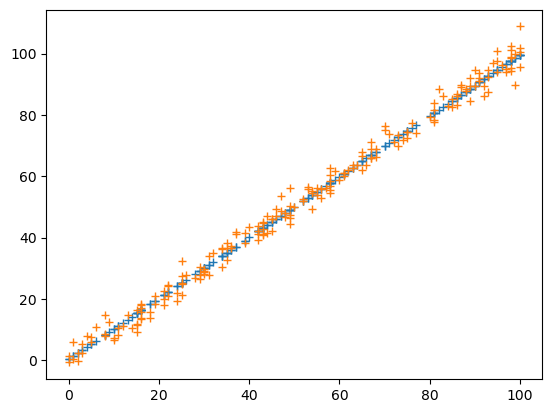

In [57]:
plt.plot(test_input, test_predictions, "+")
plt.plot(test_input, test_output, "+")
plt.show()

###  Cost of Prediction

In [58]:
cost_function(test_output, test_predictions)

4.0001958501342365

In [ ]:
pred +/- 4.0001958

#  Linear Regression Using SciKitLearn Library

### Training model 

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr_model = LinearRegression()

In [62]:
lr_model.fit(train_input, train_output)

LinearRegression()

In [63]:
lr_model.coef_

array([[1.0009993]])

In [64]:
lr_model.intercept_

array([-0.23603461])

###  Prediction

In [65]:
test_predictions = lr_model.predict(test_input)

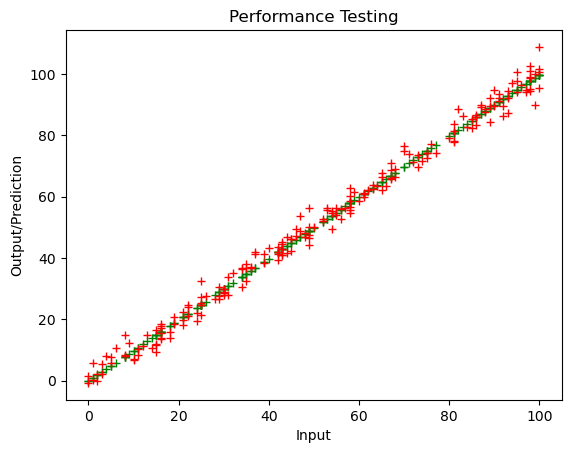

In [66]:
plt.plot(test_input, test_predictions, "+", color='green')
plt.plot(test_input, test_output, "+", color='red')
plt.title('Performance Testing')
plt.xlabel('Input')
plt.ylabel('Output/Prediction')
plt.show()


###  Cost

In [69]:
from sklearn.metrics import mean_squared_error



In [71]:
cost = mean_squared_error(test_input, test_predictions)
cost

0.034924736049888876